In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\kkpai\OneDrive - University of Florida/geosciences/cneos_fireball_data_csv.csv')
print(df.head())

  Peak Brightness Date/Time (UT) Latitude (deg.) Longitude (deg.)  \
0            2025-04-08 14:16:48           32.2S            10.4E   
1            2025-03-29 08:12:43           49.3S            14.3E   
2            2025-03-27 16:05:23           14.3N           111.5W   
3            2025-03-24 05:51:43           70.4S           114.2E   
4            2025-03-21 05:06:26           22.8S           123.5E   

   Altitude (km)  Velocity (km/s)    vx    vy    vz  \
0           44.9             22.6 -20.4   9.7  -0.4   
1           21.6             12.3  -8.9  -5.2   6.8   
2           38.1             21.3  -7.3  19.8  -2.8   
3           21.5             28.2  -0.9 -24.8  13.4   
4           54.2              NaN   NaN   NaN   NaN   

   Total Radiated Energy (J)  Calculated Total Impact Energy (kt)  
0               2.100000e+10                                0.076  
1               5.900000e+10                                0.190  
2               1.045000e+12                      

In [10]:
energy_data = df['Calculated Total Impact Energy (kt)'].dropna()
total_rad = df['Total Radiated Energy (J)'].dropna()

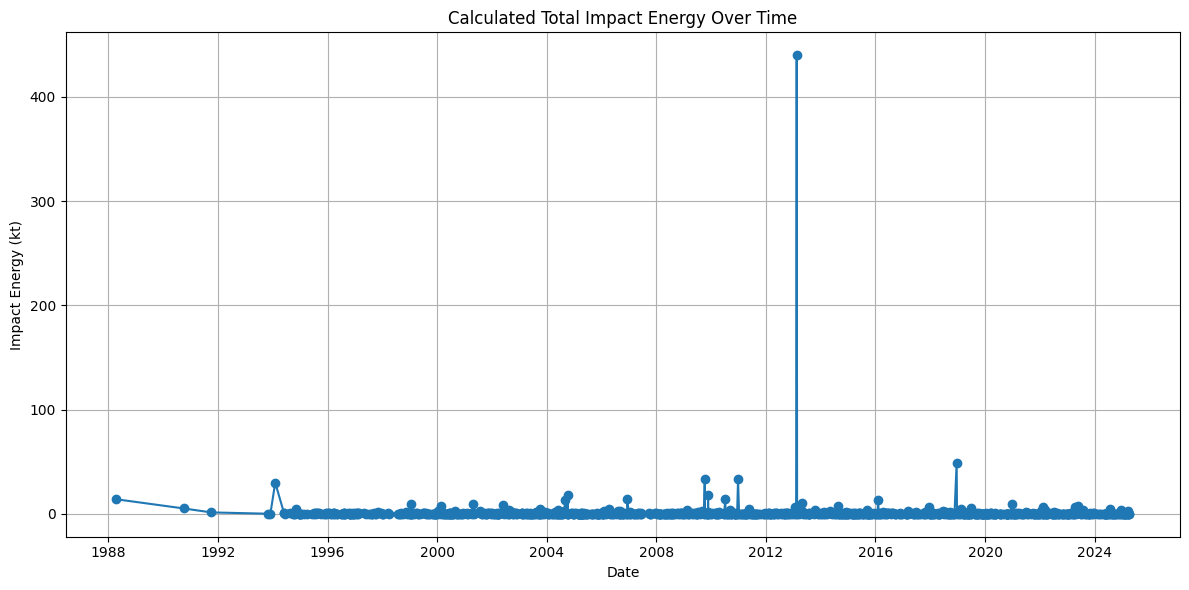

In [3]:

df['Peak Brightness Date/Time (UT)'] = pd.to_datetime(df['Peak Brightness Date/Time (UT)'])

df_sorted = df.sort_values('Peak Brightness Date/Time (UT)')

plt.figure(figsize=(12, 6))
plt.plot(df_sorted['Peak Brightness Date/Time (UT)'],
         df_sorted['Calculated Total Impact Energy (kt)'], marker='o', linestyle='-')
plt.title('Calculated Total Impact Energy Over Time')
plt.xlabel('Date')
plt.ylabel('Impact Energy (kt)')
plt.grid(True)
plt.tight_layout()
plt.show()


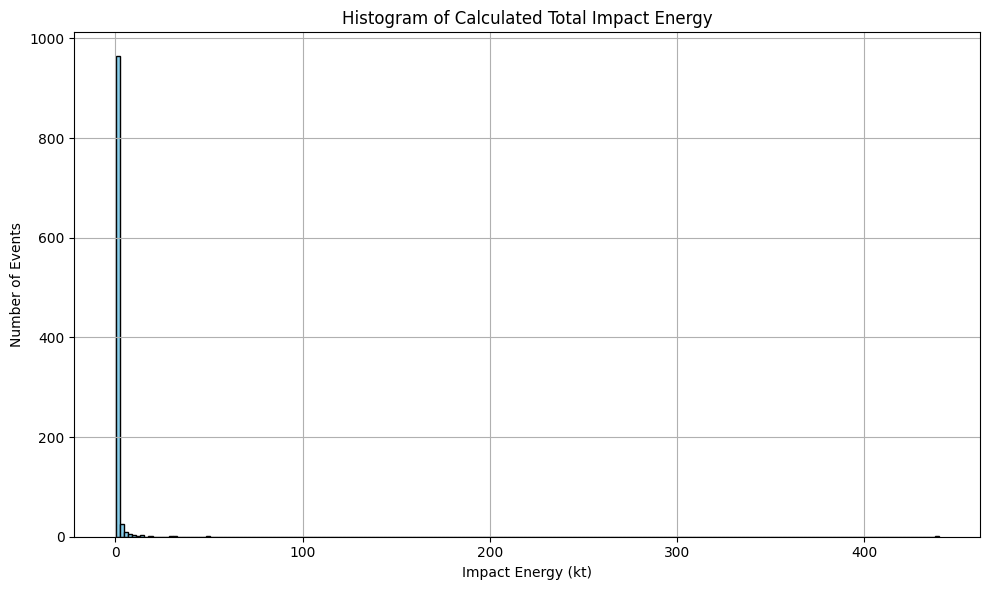

In [13]:
import matplotlib.pyplot as plt

energy_data = df['Calculated Total Impact Energy (kt)'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(energy_data, bins=200, color='skyblue', edgecolor='black')
plt.title('Histogram of Calculated Total Impact Energy')
plt.xlabel('Impact Energy (kt)')
plt.ylabel('Number of Events')
plt.grid(True)
plt.tight_layout()
plt.show()


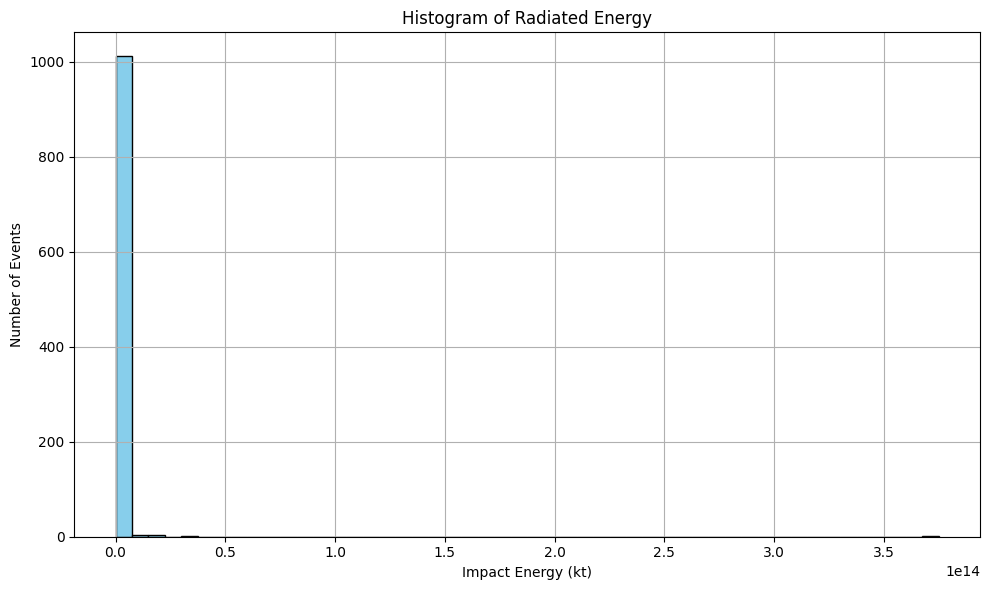

In [12]:
energy_data = df['Calculated Total Impact Energy (kt)'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(total_rad, bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Radiated Energy')
plt.xlabel('Impact Energy (kt)')
plt.ylabel('Number of Events')
plt.grid(True)
plt.tight_layout()
plt.show()


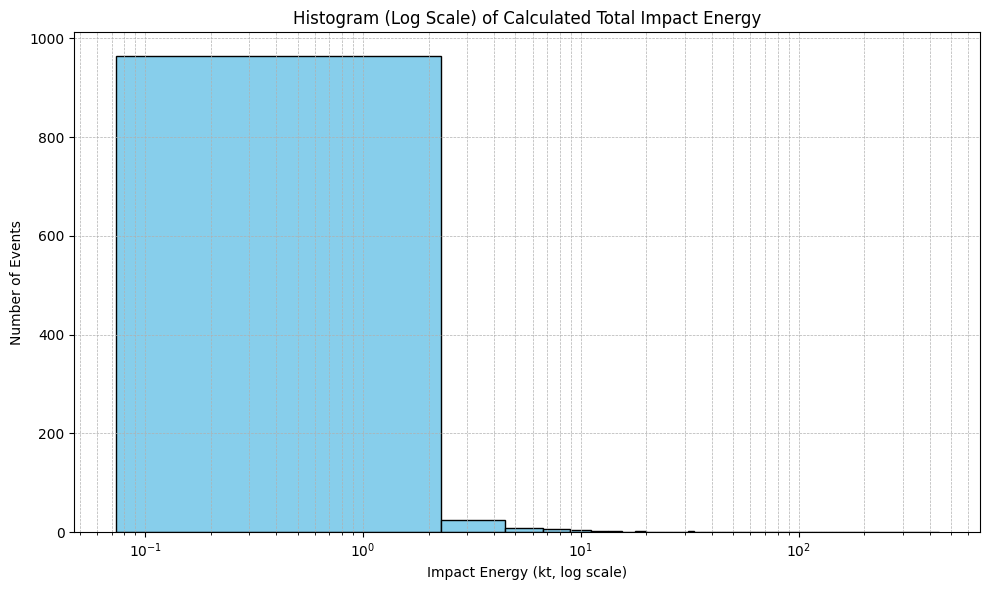

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(energy_data, bins=200, color='skyblue', edgecolor='black')
plt.xscale('log')  
plt.title('Histogram (Log Scale) of Calculated Total Impact Energy')
plt.xlabel('Impact Energy (kt, log scale)')
plt.ylabel('Number of Events')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


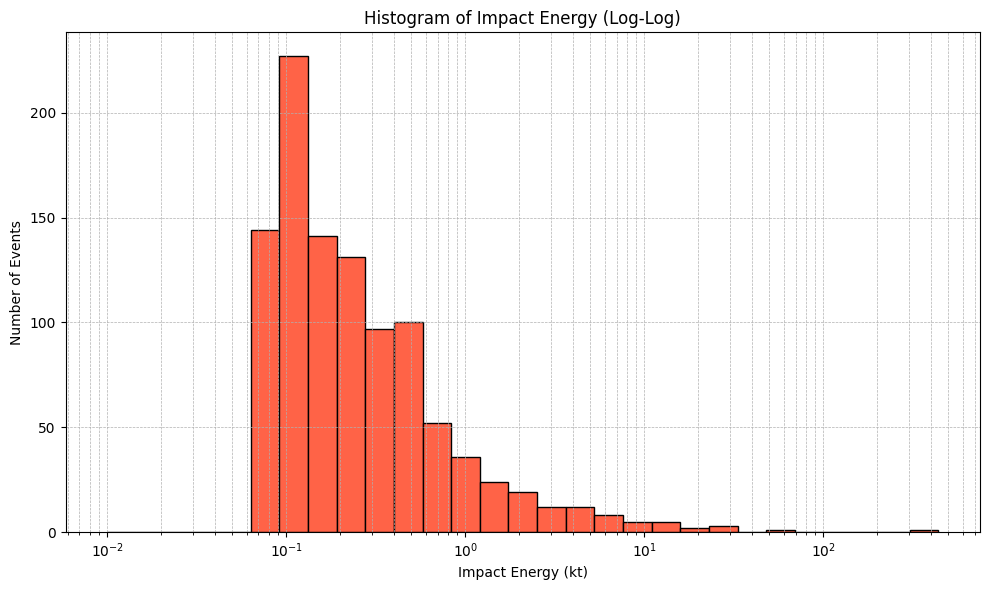

In [60]:
import numpy as np

# log-spaced bins
log_bins = np.logspace(np.log10(0.01), np.log10(energy_data.max()), 30)

plt.figure(figsize=(10, 6))
plt.hist(energy_data, bins=log_bins, color='tomato', edgecolor='black')
plt.xscale('log')
plt.title('Histogram of Impact Energy (Log-Log)')
plt.xlabel('Impact Energy (kt)')
plt.ylabel('Number of Events')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('Impact_E_hist.png')
plt.show()



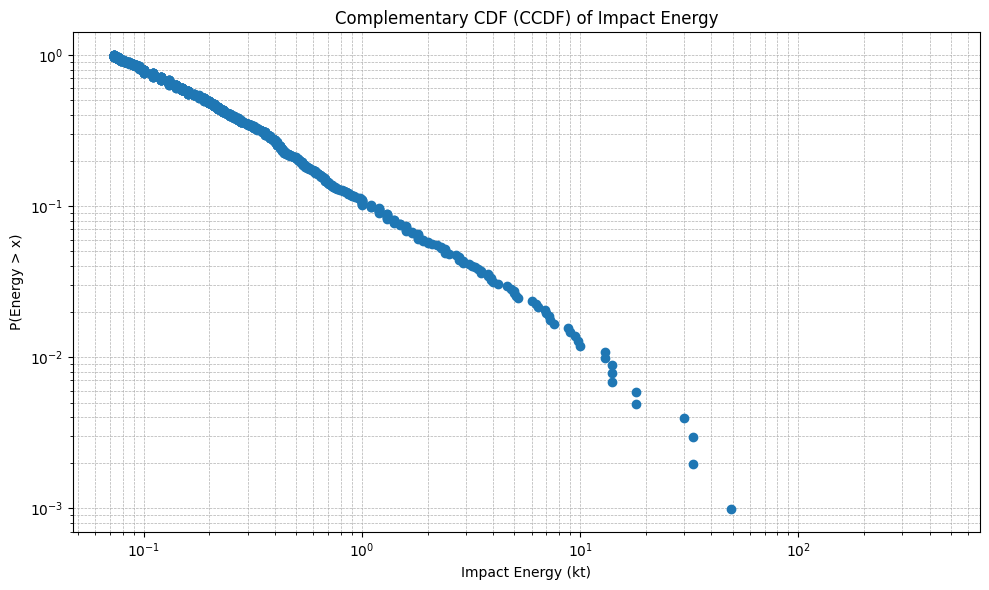

In [16]:

sorted_energy = np.sort(energy_data)
ccdf = 1.0 - np.arange(1, len(sorted_energy)+1) / len(sorted_energy)

plt.figure(figsize=(10, 6))
plt.plot(sorted_energy, ccdf, marker='o', linestyle='none')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Impact Energy (kt)')
plt.ylabel('P(Energy > x)')
plt.title('Complementary CDF (CCDF) of Impact Energy')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


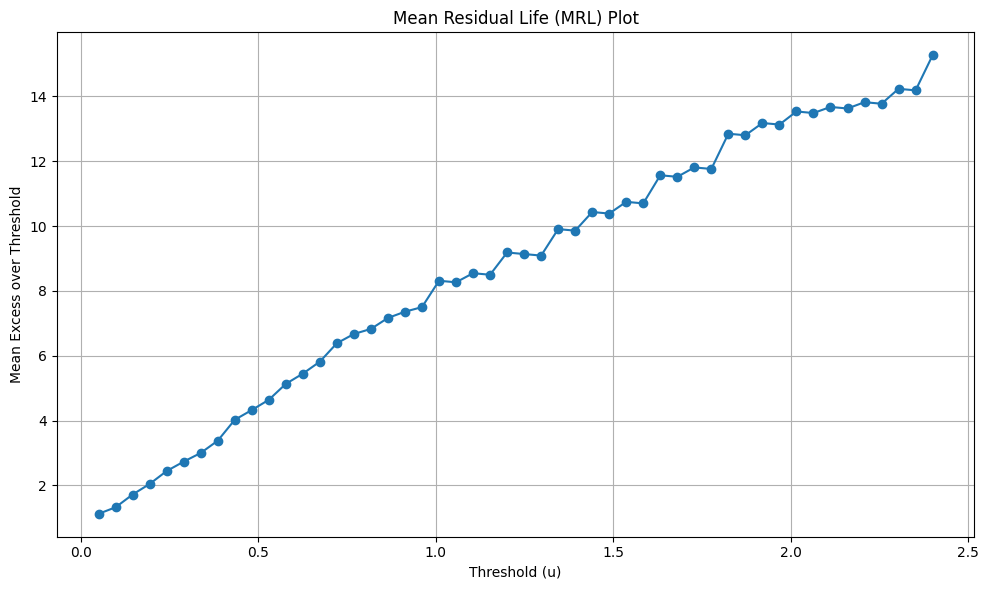

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genpareto

energy_sorted = np.sort(energy_data)
thresholds = np.linspace(0.05, np.percentile(energy_sorted, 95), 50)  

mean_excess = []

for u in thresholds:
    excesses = energy_data[energy_data > u] - u
    if len(excesses) > 0:
        mean_excess.append(np.mean(excesses))
    else:
        mean_excess.append(np.nan)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, mean_excess, marker='o')
plt.title('Mean Residual Life (MRL) Plot')
plt.xlabel('Threshold (u)')
plt.ylabel('Mean Excess over Threshold')
plt.grid(True)
plt.tight_layout()
plt.show()


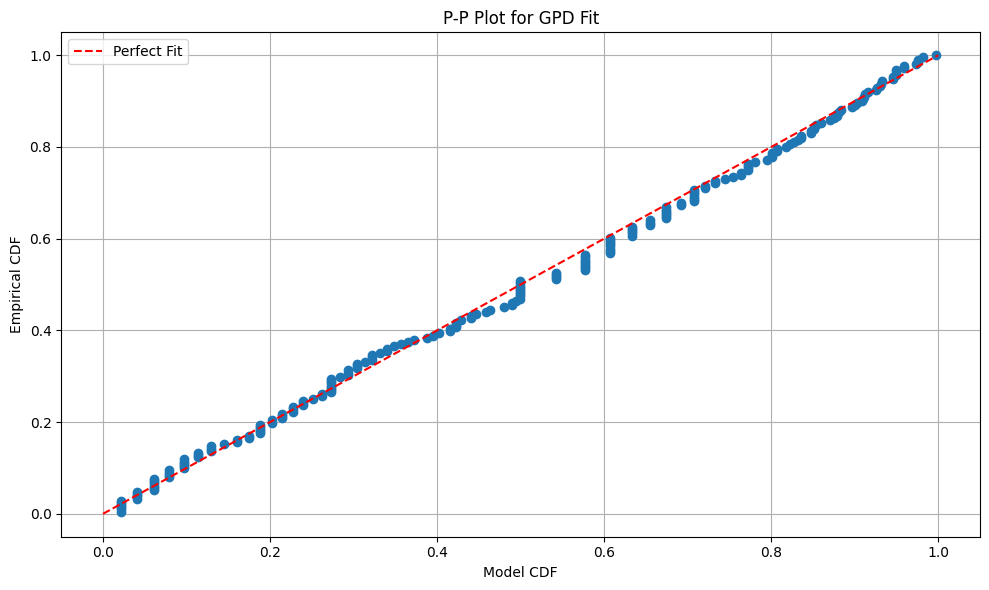

(np.float64(0.051433525614784203), np.float64(0.6132908956582095))

In [22]:
from scipy.stats import kstest

# Empirical CDF
exceedances_sorted = np.sort(exceedances)
empirical_cdf = np.arange(1, len(exceedances_sorted)+1) / len(exceedances_sorted)

# model CDF
model_cdf = genpareto.cdf(exceedances_sorted, c=shape, loc=0, scale=scale)

# P-P plot
plt.figure(figsize=(10, 6))
plt.plot(model_cdf, empirical_cdf, marker='o', linestyle='none')
plt.plot([0, 1], [0, 1], 'r--', label='Perfect Fit')
plt.title('P-P Plot for GPD Fit')
plt.xlabel('Model CDF')
plt.ylabel('Empirical CDF')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Kolmogorov–Smirnov test
ks_stat, ks_pvalue = kstest(exceedances, 'genpareto', args=(shape, 0, scale))
ks_stat, ks_pvalue


0.6132908956582095


In [24]:
from scipy.stats import kstest, genpareto

shape, loc, scale = genpareto.fit(exceedances)

# K-S test
ks_stat, ks_pvalue = kstest(exceedances, 'genpareto', args=(shape, 0, scale))
print(f"K-S Statistic: {ks_stat:.4f}")
print(f"P-value: {ks_pvalue:.4f}")


K-S Statistic: 0.0514
P-value: 0.6133


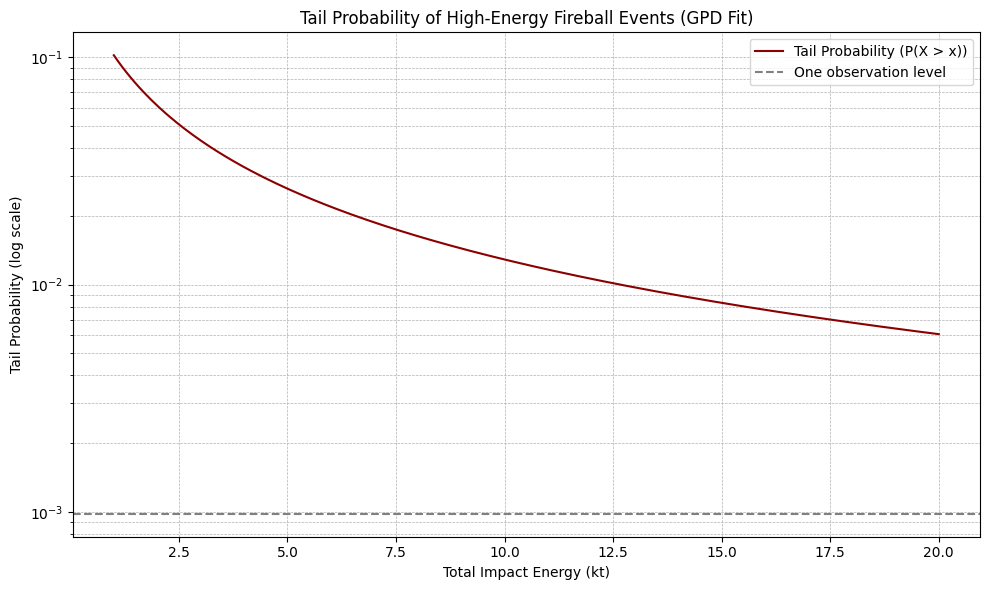

In [29]:
from scipy.stats import genpareto

threshold = 1.0
exceedances = energy_data[energy_data > threshold] - threshold

shape_refit, loc_refit, scale_refit = genpareto.fit(exceedances, floc=0)

n_total = len(energy_data)
n_exceedances = len(exceedances)

x_vals = np.linspace(threshold, 20, 200)

tail_probs = (n_exceedances / n_total) * (1 + shape_refit * (x_vals - threshold) / scale_refit) ** (-1 / shape_refit)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, tail_probs, label='Tail Probability (P(X > x))', color='darkred')
plt.yscale('log')
plt.xlabel('Total Impact Energy (kt)')
plt.ylabel('Tail Probability (log scale)')
plt.title('Tail Probability of High-Energy Fireball Events (GPD Fit)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [30]:
# target energy level
x_target = 100  # kilotons

# tail probability P(X > 100) using the GPD model
tail_prob_100kt = (n_exceedances / n_total) * (1 + shape_refit * (x_target - threshold) / scale_refit) ** (-1 / shape_refit)

# expected return period
return_period_100kt = 1 / tail_prob_100kt

tail_prob_100kt, return_period_100kt


(np.float64(0.0009795971603402615), np.float64(1020.8277856304235))

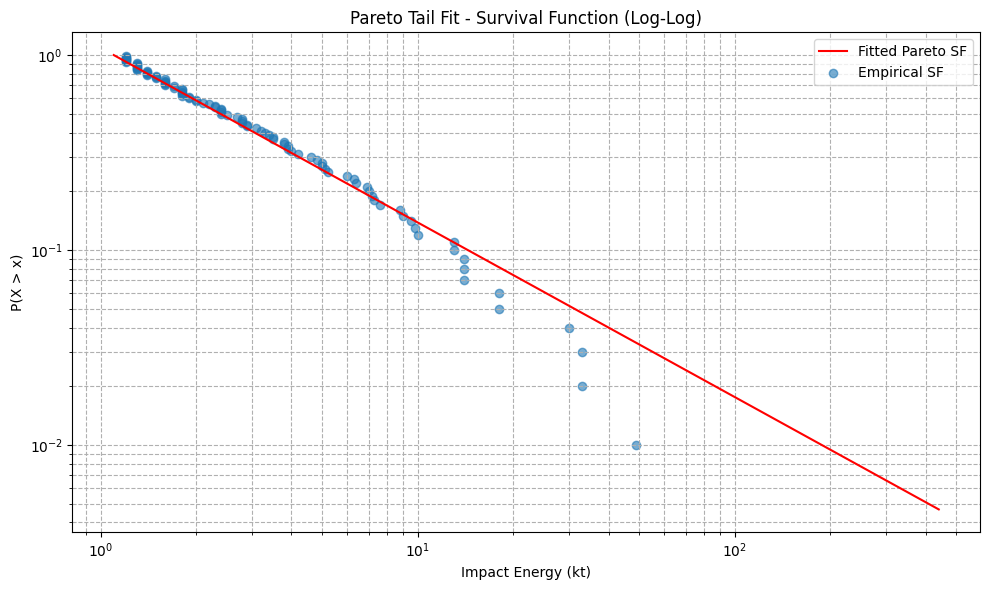

In [39]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto

df['Peak Brightness Date/Time (UT)'] = pd.to_datetime(df['Peak Brightness Date/Time (UT)'], errors='coerce')

energy_data = df['Calculated Total Impact Energy (kt)'].dropna()

threshold = np.percentile(energy_data, 90)
tail_data = energy_data[energy_data > threshold]
x_m = threshold
alpha_hat, loc, scale = pareto.fit(tail_data, floc=0, fscale=x_m)

energy_levels = [0.5, 5.0, 50.0, 100.0, 500.0]
exceed_probs = [(e, pareto.sf(e, alpha_hat, loc=0, scale=x_m)) for e in energy_levels]

min_date = df['Peak Brightness Date/Time (UT)'].min()
max_date = df['Peak Brightness Date/Time (UT)'].max()
years_of_data = (max_date - min_date).days / 365.25
events_per_year = len(energy_data) / years_of_data

expected_rates = [(e, p, p * events_per_year) for e, p in exceed_probs]
return_periods = [(e, p, rate, np.inf if rate == 0 else 1 / rate) for e, p, rate in expected_rates]

x_vals = np.linspace(x_m, tail_data.max(), 100)
fitted_sf = pareto.sf(x_vals, alpha_hat, loc=0, scale=x_m)
empirical_sf = 1 - np.arange(1, len(tail_data) + 1) / len(tail_data)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, fitted_sf, label='Fitted Pareto SF', color='red')
plt.scatter(np.sort(tail_data), empirical_sf, label='Empirical SF', alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Impact Energy (kt)')
plt.ylabel('P(X > x)')
plt.title('Pareto Tail Fit - Survival Function (Log-Log)')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.tight_layout()
plt.show()



In [40]:

results_df = pd.DataFrame(
    return_periods,
    columns=["Energy (kt)", "P(X > x)", "Expected Events per Year", "Years Between Events"]
)
display(results_df)

#This did not go well! just keeping as part of the process 

,Energy (kt),P(X > x),Expected Events per Year,Years Between Events
0,0.5,1.000000,27.582365,0.036255
1,5.0,0.257550,7.103831,0.140769
2,50.0,0.032729,0.902754,1.107722
3,100.0,0.017589,0.485143,2.061249
4,500.0,0.004159,0.114722,8.716739


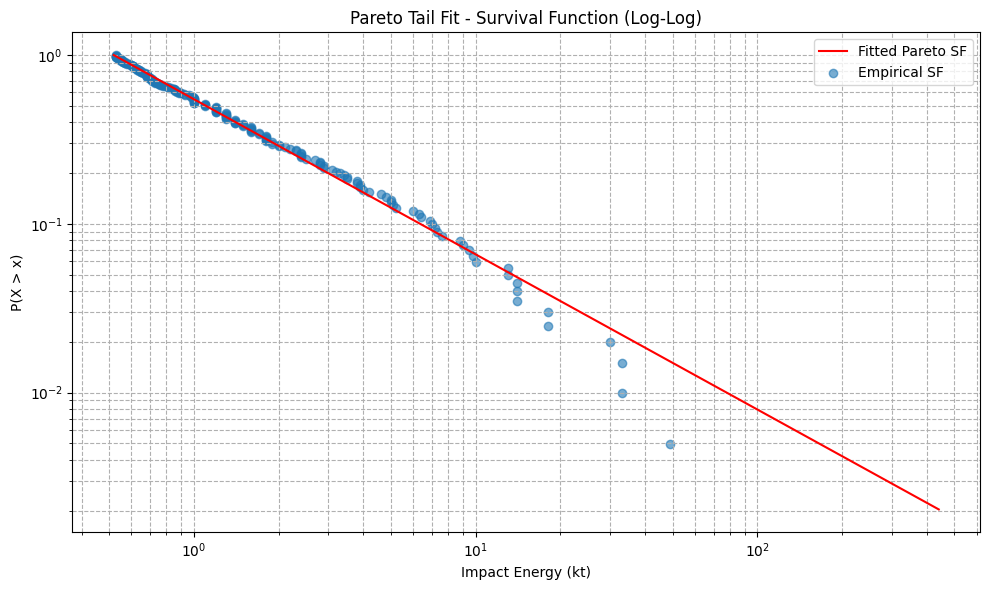

In [46]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto

df['Peak Brightness Date/Time (UT)'] = pd.to_datetime(df['Peak Brightness Date/Time (UT)'], errors='coerce')

energy_data = df['Calculated Total Impact Energy (kt)'].dropna()

# fit Pareto distribution to the tail 
threshold = np.percentile(energy_data, 80)
tail_data = energy_data[energy_data > threshold]
x_m = threshold
alpha_hat, loc, scale = pareto.fit(tail_data, floc=0, fscale=x_m)

energy_levels = [0.5, 5.0, 50.0, 100.0, 500.0]
exceed_probs = [(e, pareto.sf(e, alpha_hat, loc=0, scale=x_m)) for e in energy_levels]

# duration of the dataset
min_date = df['Peak Brightness Date/Time (UT)'].min()
max_date = df['Peak Brightness Date/Time (UT)'].max()
years_of_data = (max_date - min_date).days / 365.25
events_per_year = len(energy_data) / years_of_data

# expected events per year
expected_rates = [(e, p, p * events_per_year) for e, p in exceed_probs]
return_periods = [(e, p, rate, np.inf if rate == 0 else 1 / rate) for e, p, rate in expected_rates]

x_vals = np.linspace(x_m, tail_data.max(), 100)
fitted_sf = pareto.sf(x_vals, alpha_hat, loc=0, scale=x_m)
empirical_sf = 1 - np.arange(1, len(tail_data) + 1) / len(tail_data)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, fitted_sf, label='Fitted Pareto SF', color='red')
plt.scatter(np.sort(tail_data), empirical_sf, label='Empirical SF', alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Impact Energy (kt)')
plt.ylabel('P(X > x)')
plt.title('Pareto Tail Fit - Survival Function (Log-Log)')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.tight_layout()
plt.show()



In [47]:

results_df = pd.DataFrame(
    return_periods,
    columns=["Energy (kt)", "P(X > x)", "Expected Events per Year", "Years Between Events"]
)
display(results_df)

,Energy (kt),P(X > x),Expected Events per Year,Years Between Events
0,0.5,1.000000,27.582365,0.036255
1,5.0,0.124742,3.440681,0.290640
2,50.0,0.015009,0.413992,2.415503
3,100.0,0.007934,0.218852,4.569307
4,500.0,0.001806,0.049813,20.075179


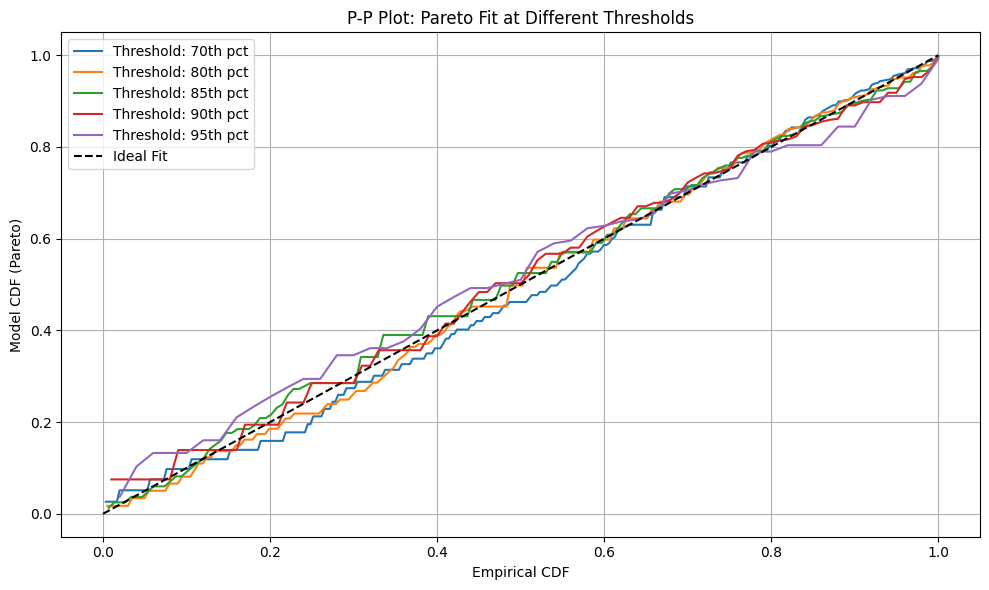

In [61]:
# thresholds to test
percentiles = [70, 80, 85, 90, 95]
pp_plot_data = {}

# empirical vs. model CDF values for each threshold
for pct in percentiles:
    threshold = np.percentile(energy_data, pct)
    tail_data = energy_data[energy_data > threshold]
    
    # Pareto
    x_m = threshold
    alpha_hat, loc, scale = pareto.fit(tail_data, floc=0, fscale=x_m)
    
    # empirical CDF
    sorted_data = np.sort(tail_data)
    empirical_cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    # model CDF from fitted Pareto
    model_cdf = pareto.cdf(sorted_data, alpha_hat, loc=0, scale=x_m)
    pp_plot_data[pct] = (empirical_cdf, model_cdf)

plt.figure(figsize=(10, 6))
for pct, (emp_cdf, mod_cdf) in pp_plot_data.items():
    plt.plot(emp_cdf, mod_cdf, label=f'Threshold: {pct}th pct')

plt.plot([0, 1], [0, 1], 'k--', label='Ideal Fit')
plt.xlabel('Empirical CDF')
plt.ylabel('Model CDF (Pareto)')
plt.title('P-P Plot: Pareto Fit at Different Thresholds')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('pareto_pp_plot_as_fail.png')
plt.show()


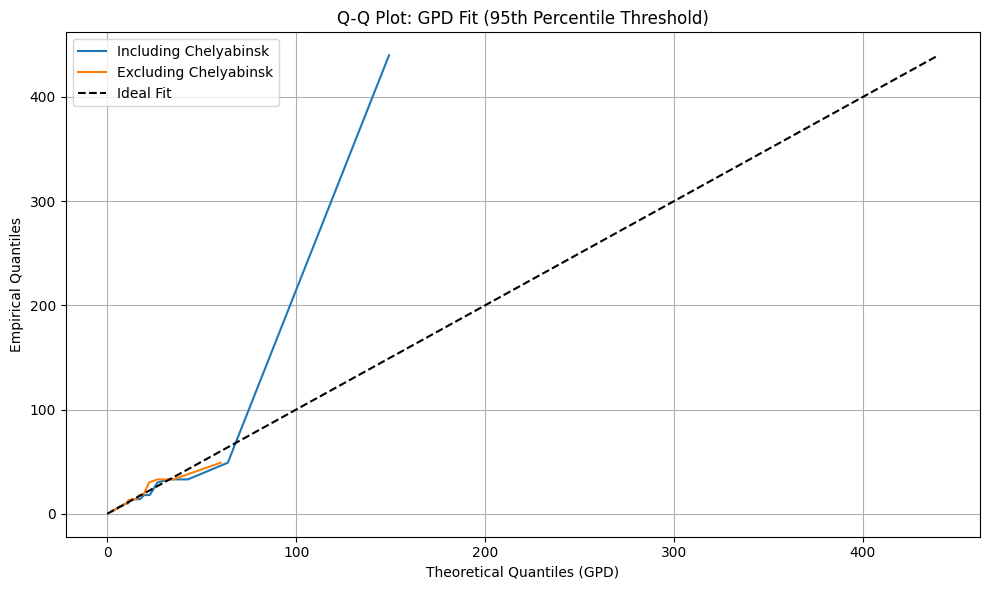

In [62]:
# identify the Chelyabinsk event by max energy
chelyabinsk_energy = energy_data.max()

# GPD fit including Chelyabinsk (95th percentile)
threshold_95 = np.percentile(energy_data, 95)
excesses_95 = energy_data[energy_data > threshold_95] - threshold_95
c_inc, loc_inc, scale_inc = genpareto.fit(excesses_95, floc=0)

energy_wo_chelyabinsk = energy_data[energy_data < chelyabinsk_energy]
excesses_95_wo = energy_wo_chelyabinsk[energy_wo_chelyabinsk > threshold_95] - threshold_95
c_exc, loc_exc, scale_exc = genpareto.fit(excesses_95_wo, floc=0)

def get_qq_data(excesses, shape, scale, label):
    sorted_emp = np.sort(excesses)
    probs = (np.arange(1, len(sorted_emp) + 1) - 0.5) / len(sorted_emp)
    theo_q = genpareto.ppf(probs, c=shape, loc=0, scale=scale)
    return theo_q + threshold_95, sorted_emp + threshold_95, label

qq_inc = get_qq_data(excesses_95, c_inc, scale_inc, "Including Chelyabinsk")
qq_exc = get_qq_data(excesses_95_wo, c_exc, scale_exc, "Excluding Chelyabinsk")

plt.figure(figsize=(10, 6))
plt.plot(*qq_inc[:2], label=qq_inc[2])
plt.plot(*qq_exc[:2], label=qq_exc[2])
plt.plot([0, max(qq_inc[1].max(), qq_exc[1].max())],
         [0, max(qq_inc[1].max(), qq_exc[1].max())],
         'k--', label='Ideal Fit')
plt.xlabel('Theoretical Quantiles (GPD)')
plt.ylabel('Empirical Quantiles')
plt.title('Q-Q Plot: GPD Fit (95th Percentile Threshold)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('Gpareto_qq_plot_as_demo_nochel.png')
plt.show()


In [52]:

# exceedance probability of Chelyabinsk energy under the fitted GPD model
chelyabinsk_excess = chelyabinsk_energy - threshold_95
p_exceed_chelyabinsk = genpareto.sf(chelyabinsk_excess, c_exc, loc=0, scale=scale_exc)

min_date = df['Peak Brightness Date/Time (UT)'].min()
max_date = df['Peak Brightness Date/Time (UT)'].max()
years = (max_date - min_date).days / 365.25
events_per_year_wo_chelyabinsk = len(energy_wo_chelyabinsk) / years

expected_events_per_year = p_exceed_chelyabinsk * events_per_year_wo_chelyabinsk
return_period_years = np.inf if expected_events_per_year == 0 else 1 / expected_events_per_year

chelyabinsk_results = pd.DataFrame([{
    "Chelyabinsk Energy (kt)": chelyabinsk_energy,
    "Threshold Used (kt)": threshold_95,
    "P(X > Chelyabinsk)": p_exceed_chelyabinsk,
    "Expected Events per Year": expected_events_per_year,
    "Estimated Years Between Events": return_period_years
}])



In [53]:
display(chelyabinsk_results)

,Chelyabinsk Energy (kt),Threshold Used (kt),P(X > Chelyabinsk),Expected Events per Year,Estimated Years Between Events
0,440.0,2.4,0.000123,0.003386,295.305414


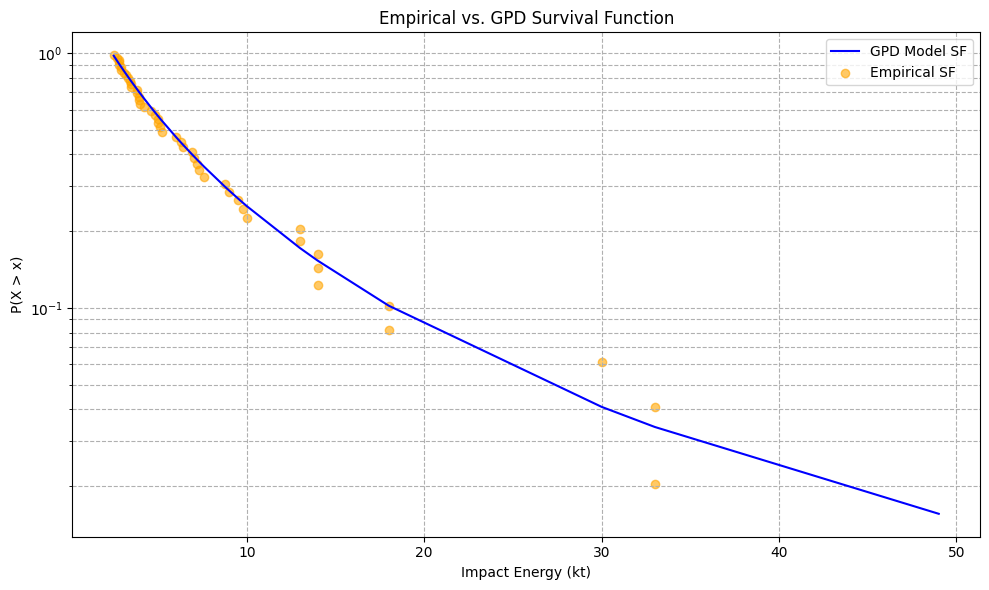

In [63]:
# Sort excess data for empirical SF
tail_data = energy_wo_chelyabinsk[energy_wo_chelyabinsk > threshold_95]
sorted_tail = np.sort(tail_data)
empirical_sf = 1 - np.arange(1, len(sorted_tail) + 1) / len(sorted_tail)
s
gpd_excesses = sorted_tail - threshold_95
model_sf = genpareto.sf(gpd_excesses, c=c_exc, loc=0, scale=scale_exc)

plt.figure(figsize=(10, 6))
plt.plot(sorted_tail, model_sf, label='GPD Model SF', color='blue')
plt.scatter(sorted_tail, empirical_sf, label='Empirical SF', alpha=0.6, color='orange')
plt.yscale('log')
plt.xlabel('Impact Energy (kt)')
plt.ylabel('P(X > x)')
plt.title('Empirical vs. GPD Survival Function')
plt.grid(True, which='both', ls='--')
plt.legend()
plt.tight_layout()
plt.savefig('gpd_survival_and prob.png')
plt.show()


In [57]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------------ --------------------------- 3.4/11.1 MB 22.3 MB/s eta 0:00:01
   --------------------------- ------------ 7.6/11.1 MB 21.3 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 21.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [58]:
from sklearn.metrics import mean_squared_error

# RMSE between model and empirical survival functions
rmse = np.sqrt(mean_squared_error(empirical_sf, model_sf))

rmse_df = pd.DataFrame([{
    "Model": "GPD (Excluding Chelyabinsk)",
    "Threshold Used (kt)": threshold_95,
    "RMSE (Empirical vs. GPD SF)": rmse
}])

display(rmse_df)


,Model,Threshold Used (kt),RMSE (Empirical vs. GPD SF)
0,GPD (Excluding Chelyabinsk),2.4,0.02486


In [59]:
from sklearn.metrics import mean_absolute_error
from scipy.stats import pareto
# refit standard Pareto to the same tail data (excluding Chelyabinsk)

# same threshold
threshold = threshold_95
tail_data = energy_wo_chelyabinsk[energy_wo_chelyabinsk > threshold]
x_m = threshold
alpha_hat, loc, scale = pareto.fit(tail_data, floc=0, fscale=x_m)

# survival functions
sorted_tail = np.sort(tail_data)
empirical_sf = 1 - np.arange(1, len(sorted_tail) + 1) / len(sorted_tail)

pareto_sf = pareto.sf(sorted_tail, alpha_hat, loc=0, scale=x_m)
gpd_excesses = sorted_tail - threshold
gpd_sf = genpareto.sf(gpd_excesses, c_exc, loc=0, scale=scale_exc)

# RMSE and MAE for both models
rmse_gpd = np.sqrt(mean_squared_error(empirical_sf, gpd_sf))
mae_gpd = mean_absolute_error(empirical_sf, gpd_sf)

rmse_pareto = np.sqrt(mean_squared_error(empirical_sf, pareto_sf))
mae_pareto = mean_absolute_error(empirical_sf, pareto_sf)

comparison_df = pd.DataFrame([
    {
        "Model": "GPD (Excluding Chelyabinsk)",
        "Threshold Used (kt)": threshold,
        "RMSE": rmse_gpd,
        "MAE": mae_gpd
    },
    {
        "Model": "Pareto (Excluding Chelyabinsk)",
        "Threshold Used (kt)": threshold,
        "RMSE": rmse_pareto,
        "MAE": mae_pareto
    }
])

display(comparison_df)


,Model,Threshold Used (kt),RMSE,MAE
0,GPD (Excluding Chelyabinsk),2.4,0.024860,0.019824
1,Pareto (Excluding Chelyabinsk),2.4,0.049606,0.044409
